# Sect 37-Pt2 - Sect 38: Time Series Modeling

- online-ds-pt-100719pt 
- 05/11/20

## Learning Objectives:

- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

## Questions?

1. Parameters for various functions: (examples below)
    - How to select the appropriate period using .diff()
    - How to select the appropriate window using .rolling()
    - How to select the appropriate halflife using ..ewm()

2. Do you just keep layering on the various methods to remove trends?  Is there a helpful order? 



3. Is log-transformed the same as original?  



4. I understand we need the data to be stationary for modeling… but when removing trends, it seems very diluted compared to the original version. The example below is from the [last lab](https://github.com/learn-co-students/dsc-removing-trends-lab-online-ds-pt-100719/tree/solution) uses the exponential rolling mean and differencing….  
    - Is there a way to reverse it back to help interpret results/explain model?
    ```python
data_diff = data_minus_exp_roll_mean.diff(periods=12)
```

# Intro to Time Series - Pt2 

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

## Working with Time Series

In [17]:
# !pip install -U fsds_100719
# %conda install pandas=0.25.1

from fsds_100719.imports import *

mpl.rcParams['figure.figsize'] = (12,6)

### Creating a Time Series from a DataFrame

In [18]:
import os,sys
file = 'https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/datasets/baltimore_crime_2020.csv'#'../../datasets/baltimore_crime_2020.csv'
df = pd.read_csv(file,low_memory=False,usecols=list(range(16)))
df.head()

CrimeDate CrimeTime CrimeCode             Location     Description  \
0  04/25/2020  17:30:00        5A     2400 SHIRLEY AVE        BURGLARY   
1  04/25/2020  02:40:00        5A  2900 MOUNT HOLLY ST        BURGLARY   
2  04/25/2020  09:30:00        5C        0 N JANNEY ST        BURGLARY   
3  04/25/2020  02:30:00        4E    900 W SARATOGA ST  COMMON ASSAULT   
4  04/25/2020  15:30:00        6C       3700 BOSTON ST         LARCENY   

  Inside/Outside Weapon   Post   District            Neighborhood  Longitude  \
0              I    NaN  533.0   NORTHERN             GREENSPRING -76.657102   
1              I    NaN  624.0  NORTHWEST           WINDSOR HILLS -76.682845   
2              I    NaN  232.0  SOUTHEAST                 KRESSON -76.560665   
3            NaN    NaN  712.0    WESTERN               POPPLETON -76.632368   
4              I    NaN  231.0  SOUTHEAST  CANTON INDUSTRIAL AREA -76.565150   

    Latitude  Location 1             Premise vri_name1  Total Incidents  
0  39.336238         NaN   ROW/TOWNHOUSE-VAC       NaN                1  
1  39.319594         NaN   ROW/TOWNHOUSE-VAC       NaN                1  
2  39.293067         NaN   ROW/TOWNHOUSE-VAC       NaN                1  
3  39.292449         NaN                 NaN       NaN                1  
4  39.277050         NaN  GROCERY/CONFECTION       NaN                1

In [19]:
## Inspect the value_counts for the different types of crimes
crime_counts = pd.DataFrame({
                             '% of Total':df['Description'].value_counts(normalize=True),
'Count':df['Description'].value_counts()})
crime_counts.style.bar('% of Total')

## Preparing Data for Time Series Visualization

- Index must be a `datetimeindex`

In [20]:
display(df.head() ,df.index)

CrimeDate CrimeTime CrimeCode             Location     Description  \
0  04/25/2020  17:30:00        5A     2400 SHIRLEY AVE        BURGLARY   
1  04/25/2020  02:40:00        5A  2900 MOUNT HOLLY ST        BURGLARY   
2  04/25/2020  09:30:00        5C        0 N JANNEY ST        BURGLARY   
3  04/25/2020  02:30:00        4E    900 W SARATOGA ST  COMMON ASSAULT   
4  04/25/2020  15:30:00        6C       3700 BOSTON ST         LARCENY   

  Inside/Outside Weapon   Post   District            Neighborhood  Longitude  \
0              I    NaN  533.0   NORTHERN             GREENSPRING -76.657102   
1              I    NaN  624.0  NORTHWEST           WINDSOR HILLS -76.682845   
2              I    NaN  232.0  SOUTHEAST                 KRESSON -76.560665   
3            NaN    NaN  712.0    WESTERN               POPPLETON -76.632368   
4              I    NaN  231.0  SOUTHEAST  CANTON INDUSTRIAL AREA -76.565150   

    Latitude  Location 1             Premise vri_name1  Total Incidents  
0  39.336238         NaN   ROW/TOWNHOUSE-VAC       NaN                1  
1  39.319594         NaN   ROW/TOWNHOUSE-VAC       NaN                1  
2  39.293067         NaN   ROW/TOWNHOUSE-VAC       NaN                1  
3  39.292449         NaN                 NaN       NaN                1  
4  39.277050         NaN  GROCERY/CONFECTION       NaN                1

RangeIndex(start=0, stop=300336, step=1)

In [21]:
# Make datetime variable
datetime = pd.to_datetime(df['CrimeDate']+' - '+df['CrimeTime'])
## Set dataframe index to be time series
df.index=datetime
df.index

DatetimeIndex(['2020-04-25 17:30:00', '2020-04-25 02:40:00',
               '2020-04-25 09:30:00', '2020-04-25 02:30:00',
               '2020-04-25 15:30:00', '2020-04-25 05:00:00',
               '2020-04-25 22:13:00', '2020-04-25 16:26:00',
               '2020-04-25 21:07:00', '2020-04-25 23:45:00',
               ...
               '1988-05-01 15:00:00', '1985-01-01 00:00:00',
               '1982-08-01 00:01:00', '1981-12-01 16:45:00',
               '1980-07-01 00:01:00', '1978-01-01 10:30:00',
               '1977-05-01 00:01:00', '1975-06-01 00:00:00',
               '1969-07-20 21:00:00', '1963-10-30 00:00:00'],
              dtype='datetime64[ns]', length=300336, freq=None)

In [22]:
df.head()

CrimeDate CrimeTime CrimeCode             Location  \
2020-04-25 17:30:00  04/25/2020  17:30:00        5A     2400 SHIRLEY AVE   
2020-04-25 02:40:00  04/25/2020  02:40:00        5A  2900 MOUNT HOLLY ST   
2020-04-25 09:30:00  04/25/2020  09:30:00        5C        0 N JANNEY ST   
2020-04-25 02:30:00  04/25/2020  02:30:00        4E    900 W SARATOGA ST   
2020-04-25 15:30:00  04/25/2020  15:30:00        6C       3700 BOSTON ST   

                        Description Inside/Outside Weapon   Post   District  \
2020-04-25 17:30:00        BURGLARY              I    NaN  533.0   NORTHERN   
2020-04-25 02:40:00        BURGLARY              I    NaN  624.0  NORTHWEST   
2020-04-25 09:30:00        BURGLARY              I    NaN  232.0  SOUTHEAST   
2020-04-25 02:30:00  COMMON ASSAULT            NaN    NaN  712.0    WESTERN   
2020-04-25 15:30:00         LARCENY              I    NaN  231.0  SOUTHEAST   

                               Neighborhood  Longitude   Latitude  Location 1  \
2020-04-25 17:30:00             GREENSPRING -76.657102  39.336238         NaN   
2020-04-25 02:40:00           WINDSOR HILLS -76.682845  39.319594         NaN   
2020-04-25 09:30:00                 KRESSON -76.560665  39.293067         NaN   
2020-04-25 02:30:00               POPPLETON -76.632368  39.292449         NaN   
2020-04-25 15:30:00  CANTON INDUSTRIAL AREA -76.565150  39.277050         NaN   

                                Premise vri_name1  Total Incidents  
2020-04-25 17:30:00   ROW/TOWNHOUSE-VAC       NaN                1  
2020-04-25 02:40:00   ROW/TOWNHOUSE-VAC       NaN                1  
2020-04-25 09:30:00   ROW/TOWNHOUSE-VAC       NaN                1  
2020-04-25 02:30:00                 NaN       NaN                1  
2020-04-25 15:30:00  GROCERY/CONFECTION       NaN                1

In [23]:
## Identify columns to drop/keep
drop_cols = ['CrimeDate','CrimeTime','CrimeCode','Location', 
             'Premise','Post','Neighborhood','Location 1',
             'vri_name1','Total Incidents','Weapon','Inside/Outside']

id_cols = ['Description','Weapon','Longitude','Latitude']

##  Drop unwanted cols
df.drop(columns=drop_cols,inplace=True)
df

Description   District  Longitude   Latitude
2020-04-25 17:30:00        BURGLARY   NORTHERN -76.657102  39.336238
2020-04-25 02:40:00        BURGLARY  NORTHWEST -76.682845  39.319594
2020-04-25 09:30:00        BURGLARY  SOUTHEAST -76.560665  39.293067
2020-04-25 02:30:00  COMMON ASSAULT    WESTERN -76.632368  39.292449
2020-04-25 15:30:00         LARCENY  SOUTHEAST -76.565150  39.277050
...                             ...        ...        ...        ...
1978-01-01 10:30:00            RAPE  NORTHEAST -76.582056  39.340492
1977-05-01 00:01:00            RAPE   NORTHERN -76.626880  39.328817
1975-06-01 00:00:00            RAPE  SOUTHWEST -76.691297  39.289582
1969-07-20 21:00:00            RAPE   NORTHERN -76.635300  39.358898
1963-10-30 00:00:00            RAPE  NORTHWEST -76.702636  39.326875

[300336 rows x 4 columns]

In [24]:
## Get list of crimes to iterate through
crime_types = df['Description'].unique()

## make a dict of all crime types' DataFrames
CRIMES = {}

for crime in crime_types:
    group_df = df.groupby('Description').get_group(crime).copy()
    group_df[crime.lower()] = (group_df['Description']==crime).astype(int)
    group_df.drop(columns=['Description'],inplace=True)
    CRIMES[crime.lower()] = group_df
    

In [25]:
CRIMES['shooting']

District  Longitude   Latitude  shooting
2020-04-25 16:09:00    CENTRAL -76.623695  39.288378         1
2020-04-24 15:59:00    EASTERN -76.584030  39.312696         1
2020-04-22 22:30:00  SOUTHWEST -76.674078  39.273023         1
2020-04-22 17:49:00    EASTERN -76.581519  39.298946         1
2020-04-22 17:55:00    WESTERN -76.639655  39.291300         1
...                        ...        ...        ...       ...
2014-01-05 16:30:00  SOUTHWEST -76.688085  39.296987         1
2014-01-05 19:41:00    CENTRAL -76.634616  39.300554         1
2014-01-03 14:32:00    WESTERN -76.645355  39.289607         1
2014-01-01 17:35:00  NORTHWEST -76.672260  39.350624         1
2014-01-01 22:31:00  NORTHEAST -76.555139  39.354011         1

[3989 rows x 4 columns]

In [26]:
## Separate out each indiviudal crime column in new TS dict
TS = {}
for crime, data in CRIMES.items():
    TS[crime] = data[crime]
    

In [27]:
TS['shooting']

2020-04-25 16:09:00    1
2020-04-24 15:59:00    1
2020-04-22 22:30:00    1
2020-04-22 17:49:00    1
2020-04-22 17:55:00    1
                      ..
2014-01-05 16:30:00    1
2014-01-05 19:41:00    1
2014-01-03 14:32:00    1
2014-01-01 17:35:00    1
2014-01-01 22:31:00    1
Name: shooting, Length: 3989, dtype: int64

In [28]:
TS['shooting'].index

DatetimeIndex(['2020-04-25 16:09:00', '2020-04-24 15:59:00',
               '2020-04-22 22:30:00', '2020-04-22 17:49:00',
               '2020-04-22 17:55:00', '2020-04-22 00:49:00',
               '2020-04-22 00:49:00', '2020-04-21 12:15:00',
               '2020-04-21 19:54:00', '2020-04-21 01:58:00',
               ...
               '2014-01-13 18:10:00', '2014-01-12 21:29:00',
               '2014-01-12 16:59:00', '2014-01-09 14:58:00',
               '2014-01-08 02:37:00', '2014-01-05 16:30:00',
               '2014-01-05 19:41:00', '2014-01-03 14:32:00',
               '2014-01-01 17:35:00', '2014-01-01 22:31:00'],
              dtype='datetime64[ns]', length=3989, freq=None)

## Visualizing Time Series

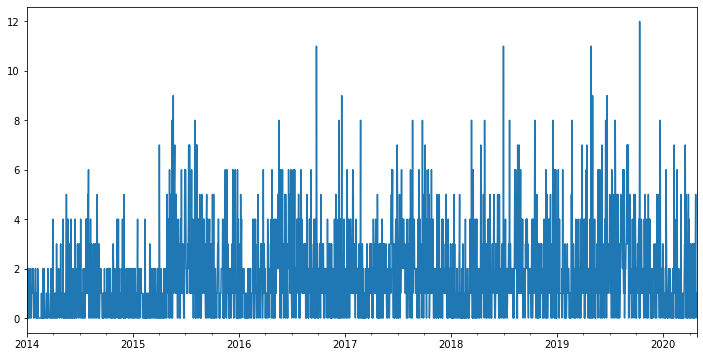

In [29]:
## Resample to daily data
ts = TS['shooting'].resample('D').sum()
ts.plot()

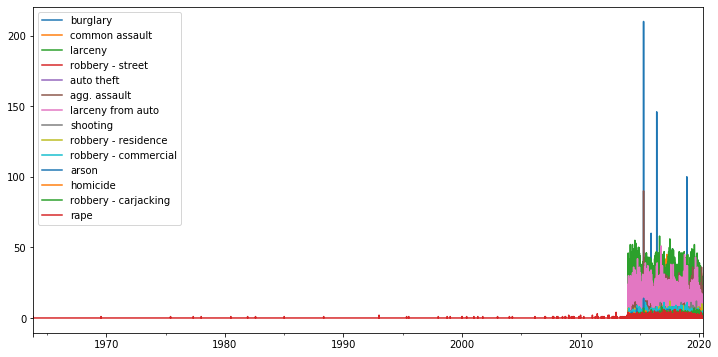

In [30]:
## Plot all crimes the same way
fig, ax = plt.subplots()
for crime,ts in TS.items():
    ts.resample('D').sum().plot(label=crime)
    
ax.legend()

### Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

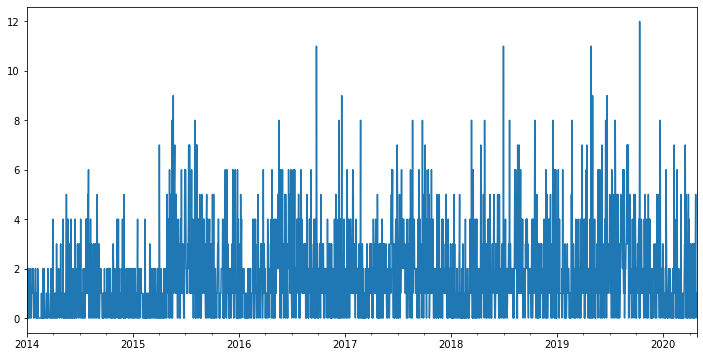

In [51]:
## Sort index
ts = TS['shooting'].resample('D').sum()
ts.loc['2014':].plot()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning:

Attempting to set identical left == right == 16071.0 results in singular transformations; automatically expanding.



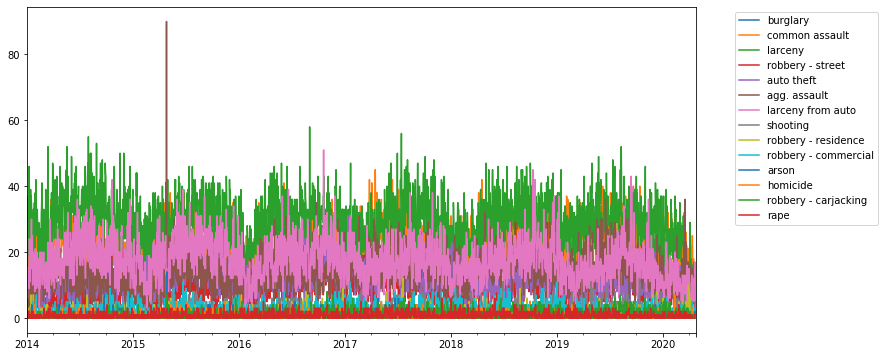

In [58]:
## Plot all crimes the same way
fig, ax = plt.subplots()
for crime,ts in TS.items():
    TS[crime] = ts.loc['2014':].resample('D').sum()
    TS[crime].plot(label=crime)
    
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

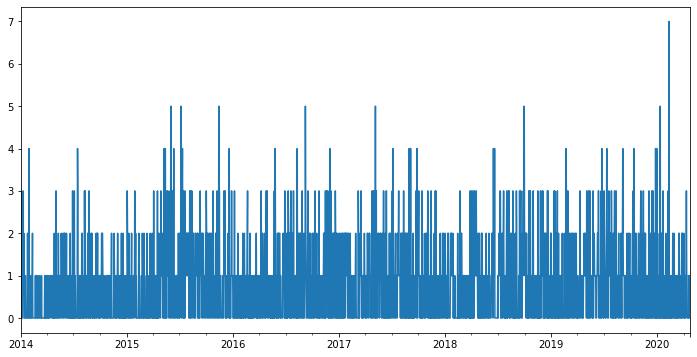

In [61]:
ts = TS['homicide']
ts.plot()

## Time series Frequencies


In [62]:
ts.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23'],
              dtype='datetime64[ns]', length=2305, freq='D')

In [63]:
# ts.isna().sum()


0

### Pandas Frequency Aliases


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

In [66]:
import warnings
warnings.filterwarnings('ignore')

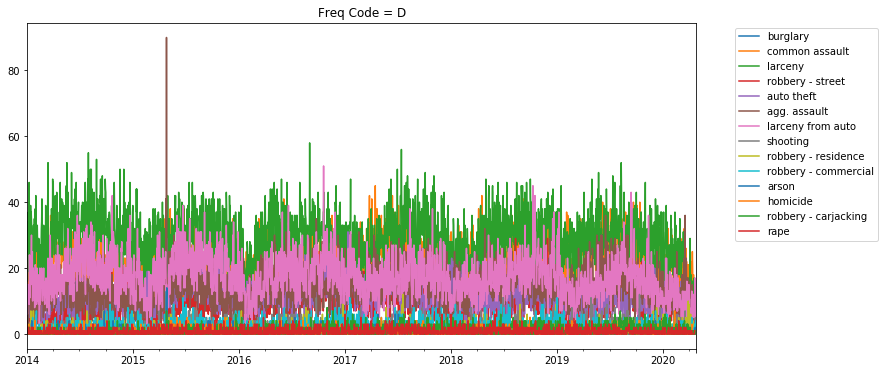

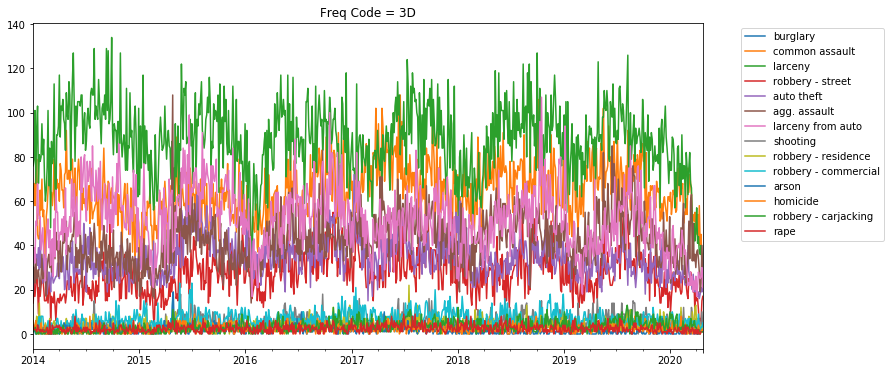

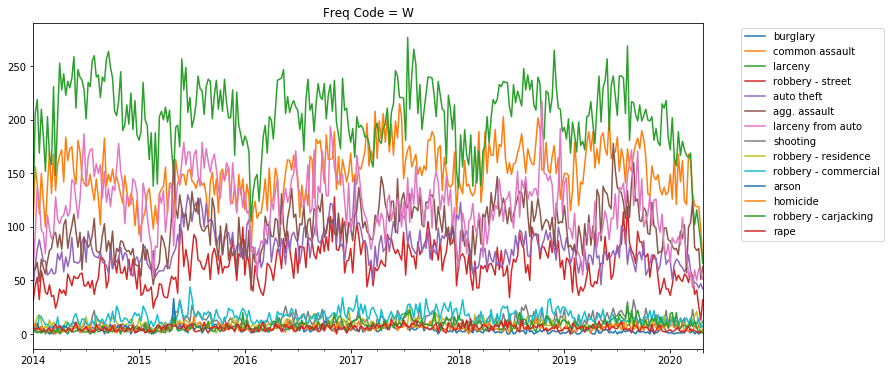

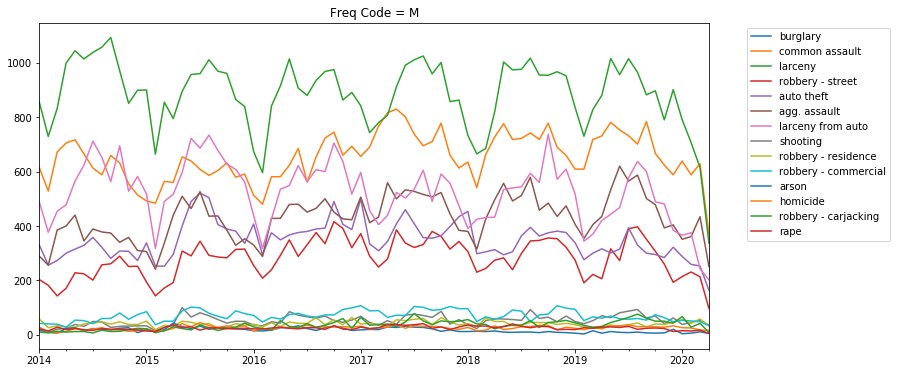

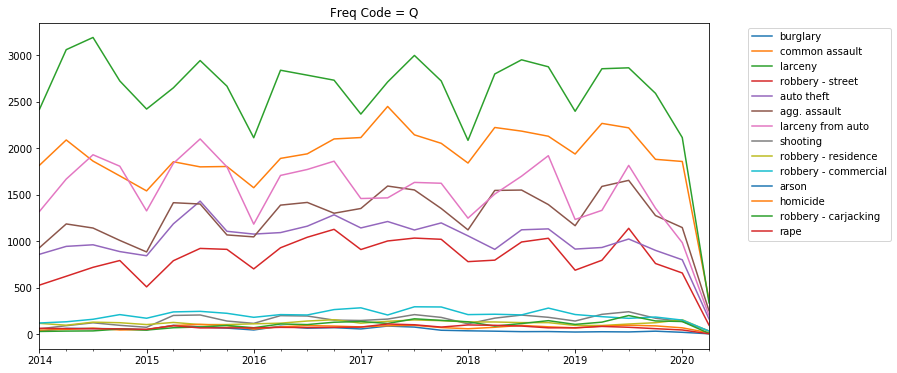

In [71]:
## Plot the same ts as different frequencies
freq_codes = ['D','3D','W','M','Q']

for freq in freq_codes:
    plt.figure()
    title= f"Freq Code = {freq}"
    ax = plt.gca()
    for crime,ts in TS.items():
        ts.resample(freq).sum().plot(title=title)
        
    ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')

## Using Datetime objects and apply statemements

In [73]:
df_ = CRIMES['homicide']
display(df_.head())
df_.dtypes

District  Longitude   Latitude  homicide
2020-04-23 09:29:00  NORTHWEST -76.691827  39.319130         1
2020-04-22 00:49:00  SOUTHWEST -76.683427  39.283381         1
2020-04-21 17:05:00   NORTHERN -76.596828  39.355719         1
2020-04-19 00:17:00    WESTERN -76.660548  39.313658         1
2020-04-12 19:43:00  NORTHWEST -76.682679  39.326125         1

District      object
Longitude    float64
Latitude     float64
homicide       int64
dtype: object

In [96]:
df_.index.to_series().dt.year.strftime('%y')

AttributeError: 'Series' object has no attribute 'strftime'

In [98]:
df_.index.to_series().apply(lambda x: x.strftime('%y'))

ValueError: NaTType does not support strftime

In [95]:
test = df_.index.to_series()[0]
test.strftime('%y')

'20'

In [81]:
help(test)

Help on Timestamp in module pandas._libs.tslibs.timestamps object:

class Timestamp(pandas._libs.tslibs.c_timestamp._Timestamp)
 |  Pandas replacement for python datetime.datetime object.
 |  
 |  Timestamp is the pandas equivalent of python's Datetime
 |  and is interchangeable with it in most cases. It's the type used
 |  for the entries that make up a DatetimeIndex, and other timeseries
 |  oriented data structures in pandas.
 |  
 |  Parameters
 |  ----------
 |  ts_input : datetime-like, str, int, float
 |      Value to be converted to Timestamp.
 |  freq : str, DateOffset
 |      Offset which Timestamp will have.
 |  tz : str, pytz.timezone, dateutil.tz.tzfile or None
 |      Time zone for time which Timestamp will have.
 |  unit : str
 |      Unit used for conversion if ts_input is of type int or float. The
 |      valid values are 'D', 'h', 'm', 's', 'ms', 'us', and 'ns'. For
 |      example, 's' means seconds and 'ms' means milliseconds.
 |  year, month, day : int
 |      .. v

In [ ]:
# t = df.index.to_series()[0]
# display(t)
# print(t)

In [ ]:
# help(t.strptime)

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [100]:
print(test.strftime("%m-%d-%Y"))
print(test.strftime("%T"))

04-23-2020
09:29:00


# Time Series Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=80%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

In [112]:
## Lab Function
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput
#     return dftest

Results of Dickey-Fuller Test:
Test Statistic                -1.781543e+01
p-value                        3.176697e-30
#Lags Used                     5.000000e+00
Number of Observations Used    2.295000e+03
Critical Value (1%)           -3.433203e+00
Critical Value (5%)           -2.862800e+00
Critical Value (10%)          -2.567441e+00
sig                            1.000000e+00
dtype: float64


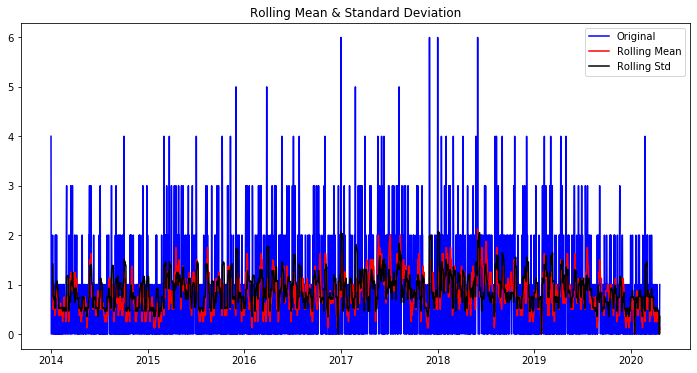

In [113]:
res = stationarity_check(ts);

In [106]:
res

(-17.815433751384507,
 3.176696966161389e-30,
 5,
 2295,
 {'1%': -3.433202561761398,
  '5%': -2.8628001971599955,
  '10%': -2.5674408601155303},
 6318.260704247796)

In [ ]:
ts_cleaned = ts_mean-ts_mean.rolling(7).mean()
ts_mean.plot()
ts_cleaned.plot()

### Types of Trends


- https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/types-of-trends

### Removing Trends 
- .diff()
- subtract rolling mean
- seasonal decomposition

## Time Series Calculations


### Rolling Statistics

In [116]:
ts = TS['homicide']
ts

2014-01-01    2
2014-01-02    3
2014-01-03    1
2014-01-04    0
2014-01-05    0
             ..
2020-04-19    1
2020-04-20    0
2020-04-21    1
2020-04-22    1
2020-04-23    1
Freq: D, Name: homicide, Length: 2305, dtype: int64

In [123]:
ts = ts.resample('W').sum()
ts

2014-01-05     6
2014-01-12    10
2014-01-19     2
2014-01-26     2
2014-02-02     7
              ..
2020-03-29     7
2020-04-05     5
2020-04-12     8
2020-04-19     1
2020-04-26     3
Freq: W-SUN, Name: homicide, Length: 330, dtype: int64

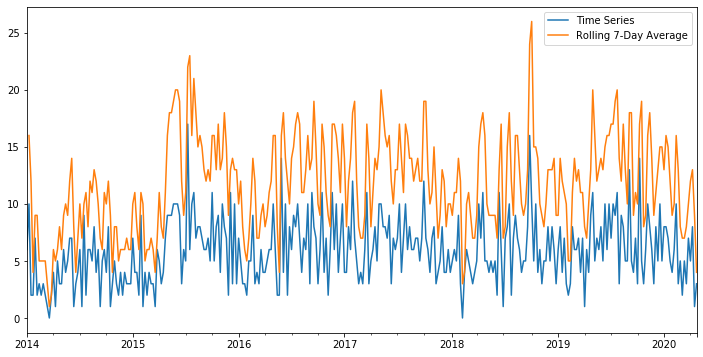

In [125]:
ts_mean = ts.rolling(window=2).sum()
ax = ts.plot(label='Time Series')
ts_mean.plot(label='Rolling 7-Day Average')
ax.legend()

In [131]:
## fill in null values
# ts.plot()
ts.ewm(halflife=2).sum()#.plot()

AttributeError: 'EWM' object has no attribute 'sum'

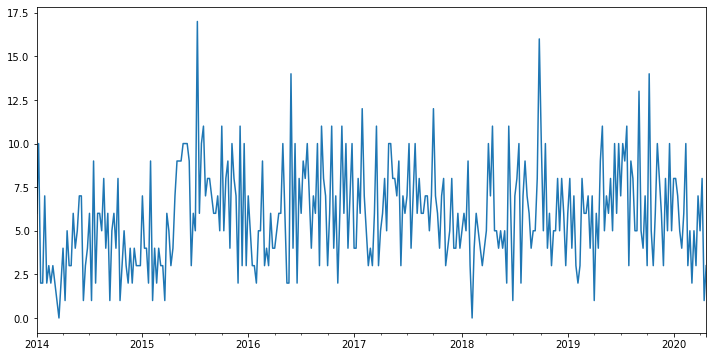

In [132]:
## Use adfull to test for stationarity
ts.plot()

# Seasonal Decomposition

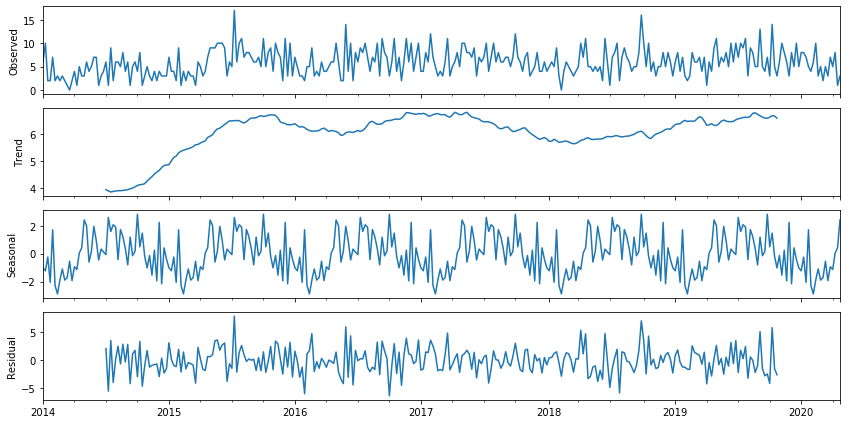

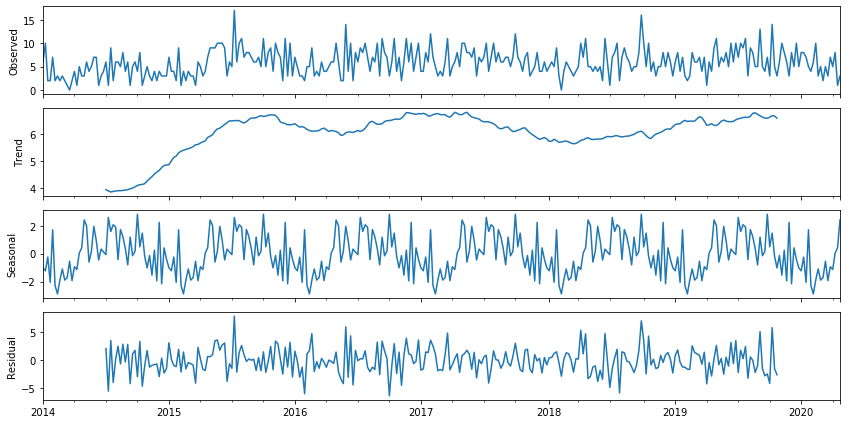

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts)#.plot();
decomp.plot()

In [137]:
decomp.resid

2014-01-05   NaN
2014-01-12   NaN
2014-01-19   NaN
2014-01-26   NaN
2014-02-02   NaN
              ..
2020-03-29   NaN
2020-04-05   NaN
2020-04-12   NaN
2020-04-19   NaN
2020-04-26   NaN
Freq: W-SUN, Name: homicide, Length: 330, dtype: float64

In [138]:
decomp.seasonal

2014-01-05   -1.009683
2014-01-12   -1.228914
2014-01-19   -0.242375
2014-01-26   -2.057760
2014-02-02    1.719163
                ...   
2020-03-29   -0.938529
2020-04-05   -1.134683
2020-04-12    0.049932
2020-04-19    0.421086
2020-04-26    2.421086
Freq: W-SUN, Name: homicide, Length: 330, dtype: float64

## A: Groupby Indexing

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3cb5d5c0>],
      dtype=object)

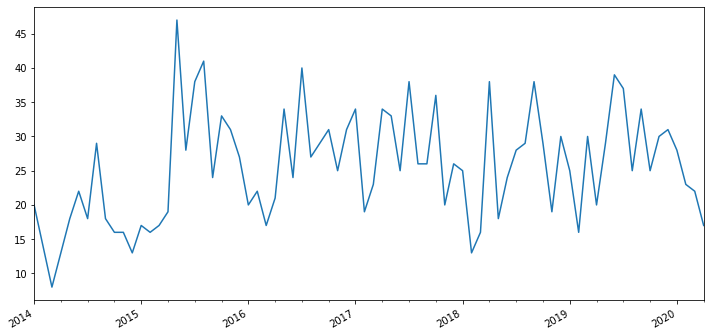

In [152]:
ts.groupby(pd.Grouper(freq='M')).sum().plot(subplots=True)

In [144]:
grp = list(CRIMES['shooting'].groupby('District'))
grp[0][0]

'CENTRAL'

In [145]:
grp[0][1]

District  Longitude   Latitude  shooting
2020-04-25 16:09:00  CENTRAL -76.623695  39.288378         1
2020-04-21 19:54:00  CENTRAL -76.623695  39.288378         1
2020-03-30 16:03:00  CENTRAL -76.631015  39.306280         1
2020-03-21 13:30:00  CENTRAL -76.622389  39.291804         1
2020-03-17 18:27:00  CENTRAL -76.628409  39.306977         1
...                      ...        ...        ...       ...
2014-04-13 21:36:00  CENTRAL -76.629327  39.306270         1
2014-03-01 20:16:00  CENTRAL -76.632770  39.301938         1
2014-01-20 01:47:00  CENTRAL -76.620813  39.288388         1
2014-01-19 00:49:00  CENTRAL -76.610196  39.292432         1
2014-01-05 19:41:00  CENTRAL -76.634616  39.300554         1

[286 rows x 4 columns]